In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
import time
import sklearn
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

for module in np, sklearn, tf.keras, pd:
    print(module.__name__, module.__version__)


2.0.0
numpy 1.17.4
sklearn 0.22
tensorflow_core.keras 2.2.4-tf
pandas 0.25.3


In [2]:
fashion_minst = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_minst.load_data()
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

print(x_valid.shape, x_train.shape)

(5000, 28, 28) (55000, 28, 28)


In [3]:
scaler = StandardScaler()
x_train_scalerd = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scalerd = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scalerd = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

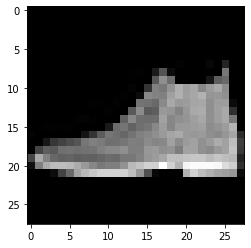

In [4]:
def show_sigle_image(img_arr):
    plt.imshow(img_arr, cmap='gray')
    plt.show()

show_sigle_image(x_test[0])

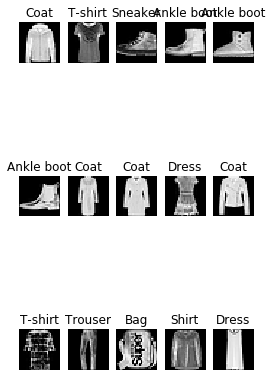

In [5]:
def show_images(rows, cols, x, y, class_name):
    assert len(x) == len(y)
    assert rows * cols <= len(x)
    plt.figure(figsize=(rows * 1.4, cols * 1.6))
    for row in range(rows):
        for col in range(cols):
            index = row * cols + col
            plt.subplot(rows, cols, index + 1)
            plt.imshow(x[index], cmap="gray", interpolation="nearest")
            plt.axis('off')
            plt.title(class_name[y[index]])
    plt.show()


class_name = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

show_images(3, 5, x_train, y_train, class_name)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(128, 'relu'))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, 'selu'))
model.add(tf.keras.layers.AlphaDropout(rate=0.5))
model.add(tf.keras.layers.Dense(10, 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [7]:
log_dir = "./callback"
if os.path.exists(log_dir):
    pass
else:
    os.mkdir(log_dir)

log_file = os.path.join(log_dir, 'fashion_mnist.h5')

callback = [
    tf.keras.callbacks.TensorBoard(log_dir),
    tf.keras.callbacks.ModelCheckpoint(log_file, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)
]

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), callbacks=callback)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 12s 223us/sample - loss: 0.8393 - accuracy: 0.7015 - val_loss: 0.6674 - val_accuracy: 0.8228

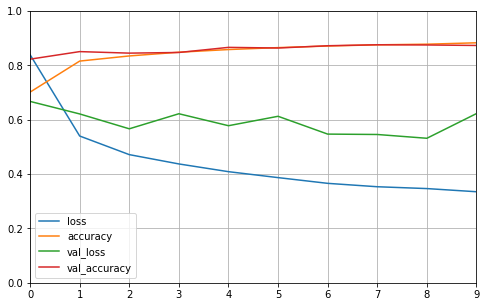

In [8]:
def plot_lerning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_lerning_curves(history)

In [9]:
model.evaluate(x_test_scalerd, y_test, verbose=2)



10000/1 - 1s - loss: 4.0407 - accuracy: 0.4645


[3.498433349227905, 0.4645]